In [1]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import plotly.express as px

sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

### Self-control stops
1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?
2. Calculate median and mean prices for apartments for sell before cleaning the data.
2. Find houses with the most cheapest and most expensive price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.
3. Find the most expensive and the most cheapest apartment in St. Petersburg after cleaning outliers.
4. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

In [2]:
spb_df = pd.read_table('spb.real.estate.archive.2018.tsv')

In [3]:
# at first let's split our dataframe to rent and sell
# Select some part of dataframe according to conditions in brackets
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
# .format function allows you to put variales' values instead of {} in the final string
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


In [4]:
spb_df.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id
count,4.291870e+05,4.291870e+05,429187.000000,429187.000000,429187.000000,341591.000000,364544.000000,149229.000000,295659.000000,429187.000000,429187.0,4.291870e+05
mean,4.840885e+18,4.202162e+06,6.673296,1.778169,57.423093,11.526046,32.627916,65.705497,3.677206,1.398861,2.0,4.580242e+18
std,2.712898e+18,9.527811e+06,5.248549,1.060154,33.121345,48.717769,20.880149,33.820077,4.187101,0.489665,0.0,2.717262e+18
min,7.797270e+05,1.300000e+02,1.000000,0.000000,6.000000,1.040000,1.500000,0.000000,0.000000,1.000000,2.0,4.585730e+14
25%,2.573081e+18,2.800000e+04,3.000000,1.000000,37.500000,8.000000,18.000000,50.000000,0.000000,1.000000,2.0,2.153540e+18
50%,5.153034e+18,2.850000e+06,5.000000,2.000000,48.600000,10.000000,29.000000,60.000000,3.000000,1.000000,2.0,4.652023e+18
75%,7.140224e+18,5.170000e+06,9.000000,2.000000,67.000000,12.980000,40.000000,100.000000,7.000000,2.000000,2.0,6.919866e+18
max,9.223371e+18,7.630000e+08,92.000000,22.000000,1000.000000,25000.000000,2015.000000,100.000000,14.000000,2.000000,2.0,9.220758e+18


## Before Cleaning (1st and 2nd tasks)

**Calculate median, mean and max prices for apartments for sell and rent before cleaning the data**

In [5]:
# let's check median and price for renting apartments
# .last_price indicates that you use data just from the column named last_price
sell_median_price = sell_df.last_price.median()
sell_mean_price = sell_df.last_price.mean()
print("Sell median price: {}".format(sell_median_price))
print("Sell mean price: {}".format(sell_mean_price))
print()
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

print()

# .max function returns the maximum value across all rows
max_price_sell = sell_df.last_price.max()
print("Max price in sell: {}".format(max_price_sell))
max_price_rent = rent_df.last_price.max()
print("Max price in rent: {}".format(max_price_rent))

Sell median price: 4599000.0
Sell mean price: 6969288.146034318

Rent median price: 25000.0
Rent mean price: 31719.256638977487

Max price in sell: 763000000.0
Max price in rent: 4900000.0


**Price_per_sq_m for rent and sell with and without Len.Oblast**

In [6]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

# find what's median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))
print()
# Create a new column price_per_sq_m and calculate price per sq m
sell_df['price_per_sq_m_sell'] = sell_df.last_price/sell_df.area

# find what's median and mean price per square meter in rent
median_price_per_sq_m_sell = sell_df.price_per_sq_m_sell.median()
mean_price_per_sq_m_sell = sell_df.price_per_sq_m_sell.mean()
print("Median price per sq m in sell: {}".format(median_price_per_sq_m_sell))
print("Mean price per sq m in sell: {}".format(mean_price_per_sq_m_sell))

print()
rent_df_spb = rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = round(rent_df_spb.price_per_sq_m.median(),2)
mean_price_per_sq_m_in_spb = round(rent_df_spb.price_per_sq_m.mean(),2)
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))
print("Mean price per sq m in St. Petersburg in rent: {}".format(mean_price_per_sq_m_in_spb))
print()
sell_df_spb = sell_df[sell_df.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = round(sell_df_spb.price_per_sq_m_sell.median(),2)
mean_price_per_sq_m_in_spb = round(sell_df_spb.price_per_sq_m_sell.mean(),2)
print("Median price per sq m in St. Petersburg in sell: {}".format(median_price_per_sq_m_in_spb))
print("Mean price per sq m in St. Petersburg in sell: {}".format(mean_price_per_sq_m_in_spb))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967957

Median price per sq m in sell: 95214.28571428571
Mean price per sq m in sell: 102713.8800799551

Median price per sq m in St. Petersburg in rent: 555.56
Mean price per sq m in St. Petersburg in rent: 610.39

Median price per sq m in St. Petersburg in sell: 102285.71
Mean price per sq m in St. Petersburg in sell: 113645.17


## Cleaning Sell df (3rd and 4th tasks) and Visualization

In [7]:
sell_df_sbp = sell_df[sell_df.unified_address.str.contains('Россия, Санкт-Петербург')].copy()

In [8]:
(sell_df_sbp.isna().sum() / len(sell_df_sbp)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
offer_id,0.00%
first_day_exposition,0.00%
last_day_exposition,0.00%
last_price,0.00%
floor,0.00%
open_plan,0.00%
rooms,0.00%
studio,0.00%
area,0.00%
kitchen_area,14.66%


In [9]:
sell_df_sbp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197792 entries, 0 to 428155
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   offer_id              197792 non-null  int64  
 1   first_day_exposition  197792 non-null  object 
 2   last_day_exposition   197792 non-null  object 
 3   last_price            197792 non-null  float64
 4   floor                 197792 non-null  int64  
 5   open_plan             197792 non-null  bool   
 6   rooms                 197792 non-null  int64  
 7   studio                197792 non-null  bool   
 8   area                  197792 non-null  float64
 9   kitchen_area          168799 non-null  float64
 10  living_area           179219 non-null  float64
 11  agent_fee             13142 non-null   float64
 12  renovation            142614 non-null  float64
 13  offer_type            197792 non-null  int64  
 14  category_type         197792 non-null  int64  
 15  

In [10]:
sell_df_sbp.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m_sell
count,1.977920e+05,1.977920e+05,197792.000000,197792.000000,197792.000000,168799.000000,179219.000000,13142.000000,142614.000000,197792.0,197792.0,1.977920e+05,1.977920e+05
mean,4.930802e+18,8.151205e+06,6.721783,2.024404,64.625235,11.937120,36.192785,19.687986,3.467640,1.0,2.0,4.604822e+18,1.136452e+05
std,2.743008e+18,1.283477e+07,5.381079,1.166640,40.617352,7.153193,24.297953,39.441258,3.944312,0.0,0.0,2.732627e+18,6.322742e+04
min,7.797270e+05,1.900000e+04,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,0.000000,1.0,2.0,4.585730e+14,4.871795e+02
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.200000,8.000000,19.000000,0.000000,0.000000,1.0,2.0,2.179036e+18,8.714286e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,0.000000,2.000000,1.0,2.0,4.727029e+18,1.022857e+05
75%,7.278733e+18,8.200000e+06,9.000000,3.000000,76.400000,13.900000,44.000000,1.000000,6.000000,1.0,2.0,6.919866e+18,1.230101e+05
max,9.223371e+18,7.630000e+08,88.000000,22.000000,1000.000000,174.000000,710.000000,100.000000,14.000000,1.0,2.0,9.220297e+18,9.283388e+06


In [11]:
df_num = sell_df_sbp[['last_price','floor', 'rooms', 'kitchen_area', 'living_area', 'agent_fee', 'category_type', 'offer_type', 'price_per_sq_m_sell']]
df_cat = sell_df_sbp[['open_plan','studio']]

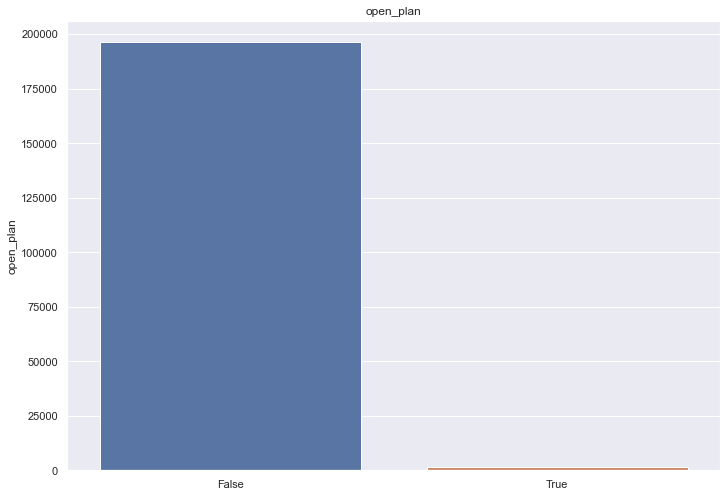

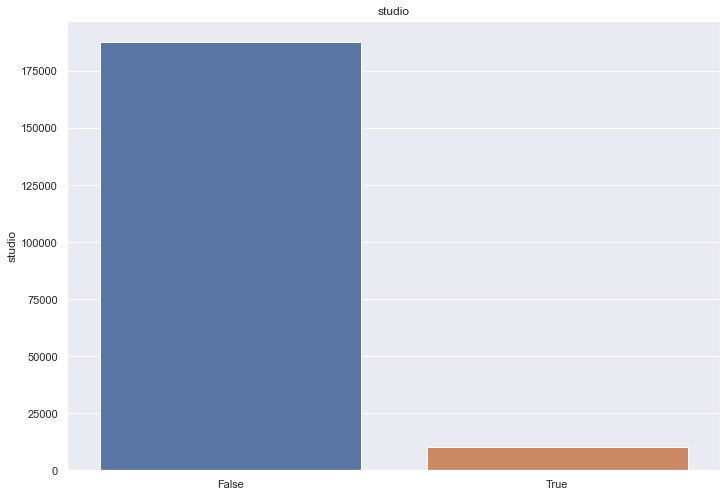

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

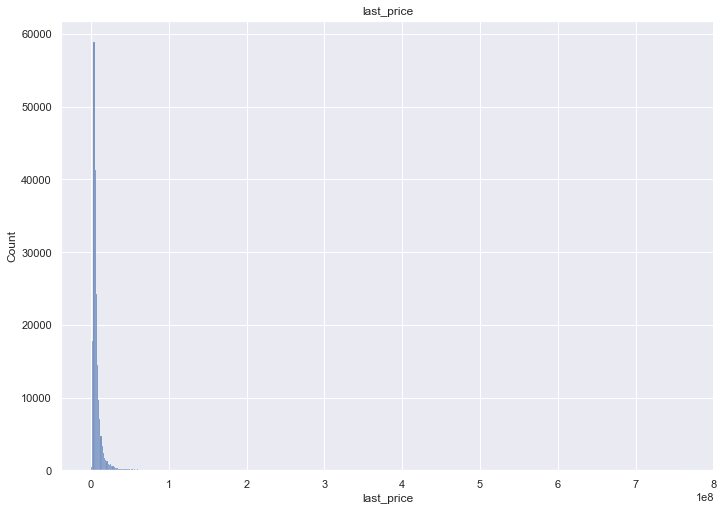

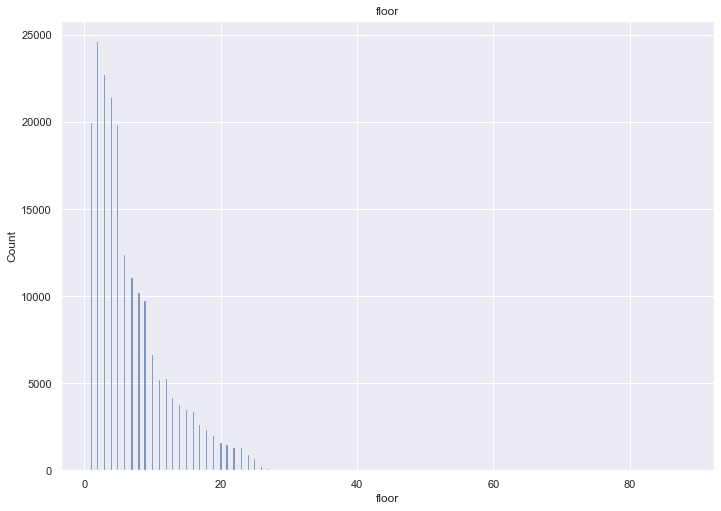

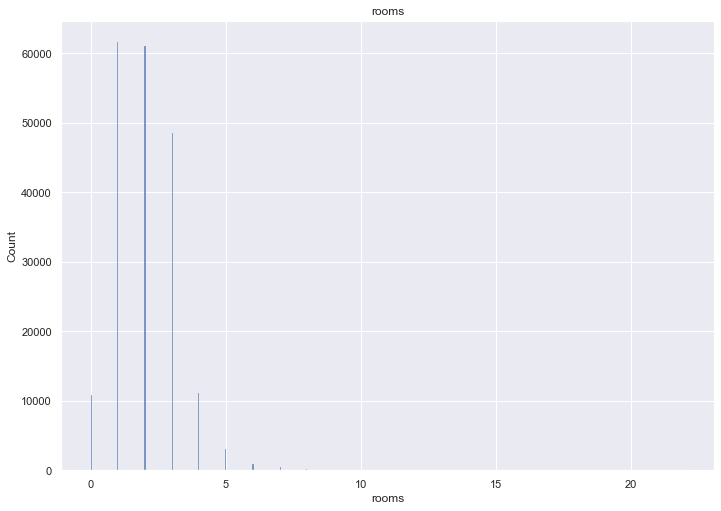

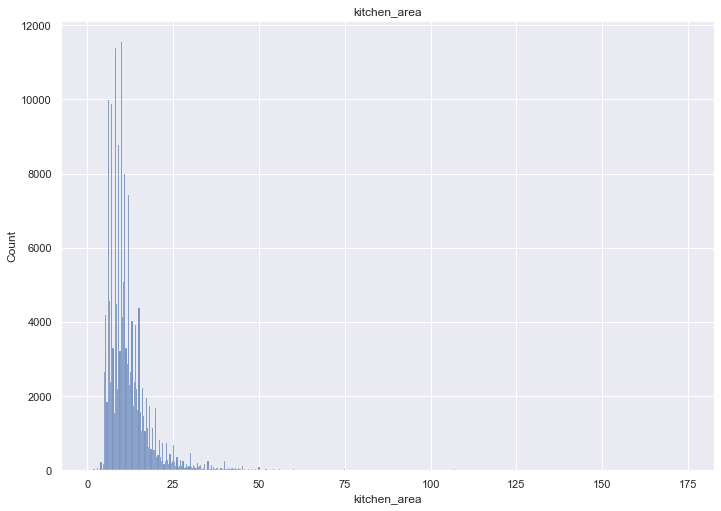

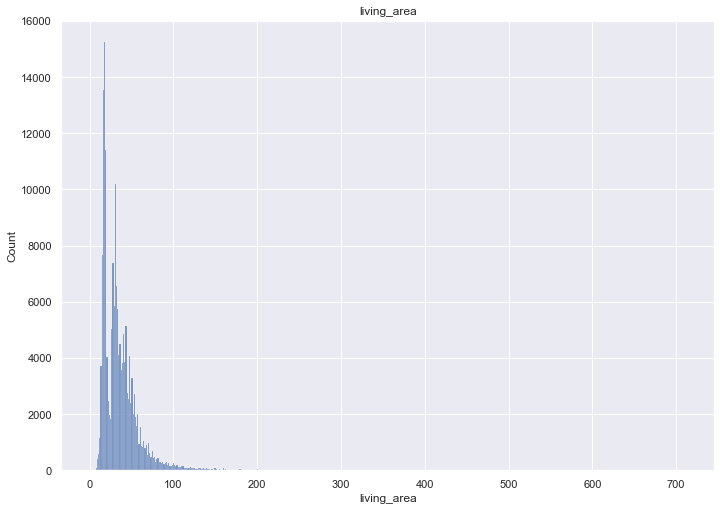

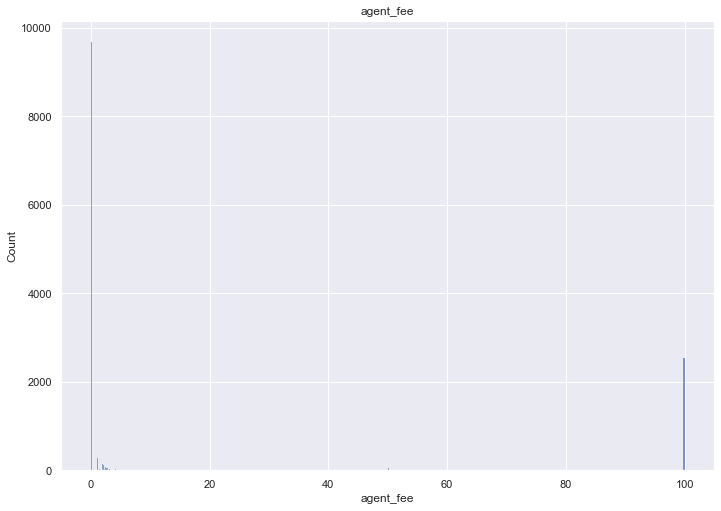

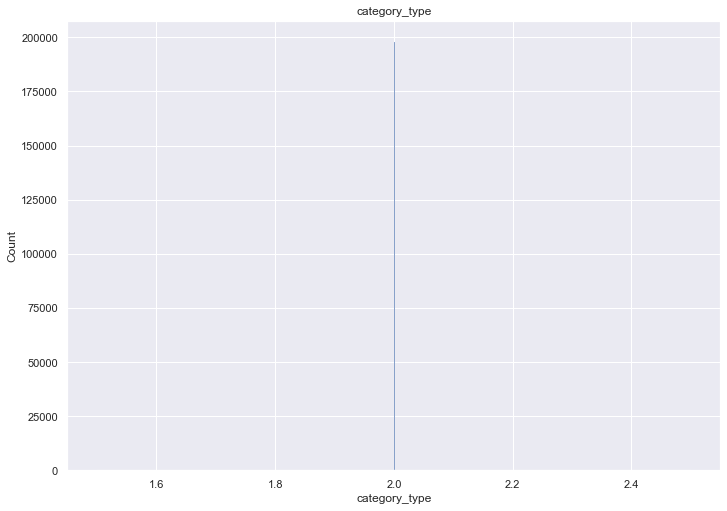

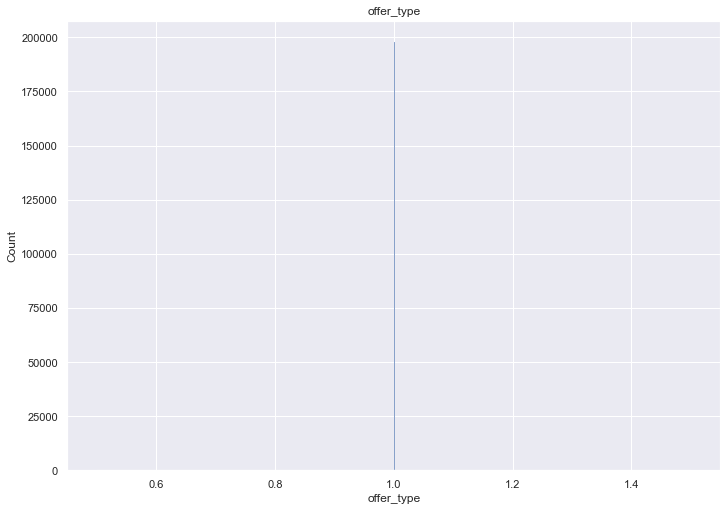

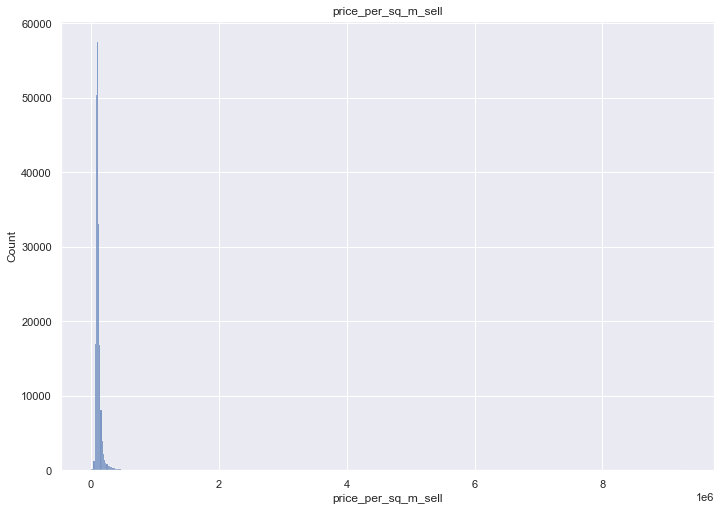

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in df_num.columns:
    sns.histplot(df_num[i], bins=500).set_title(i)
    plt.show()

In [14]:
df_num = sell_df_sbp[['last_price','floor', 'rooms', 'kitchen_area', 'living_area', 'price_per_sq_m_sell']]
sell_df_sbp.drop(columns=['category_type','agent_fee'], inplace=True)

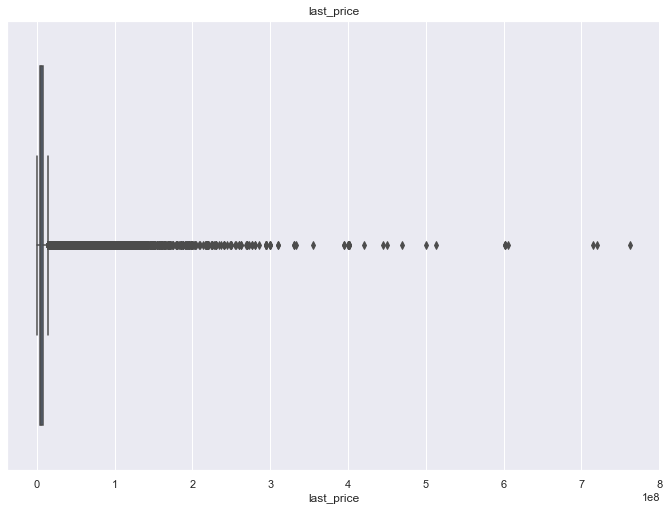

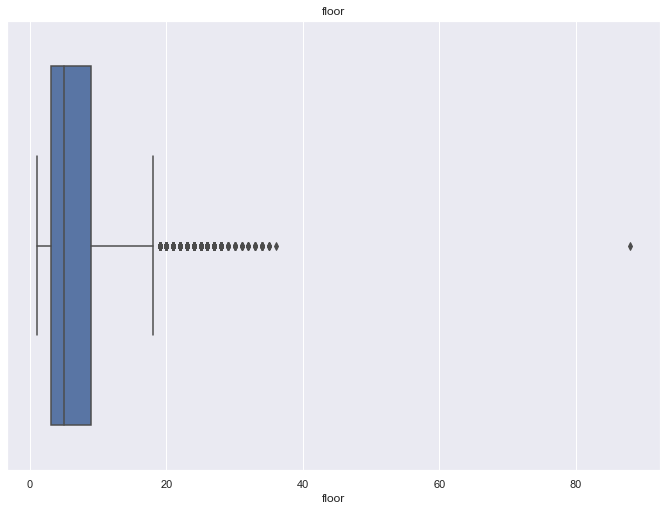

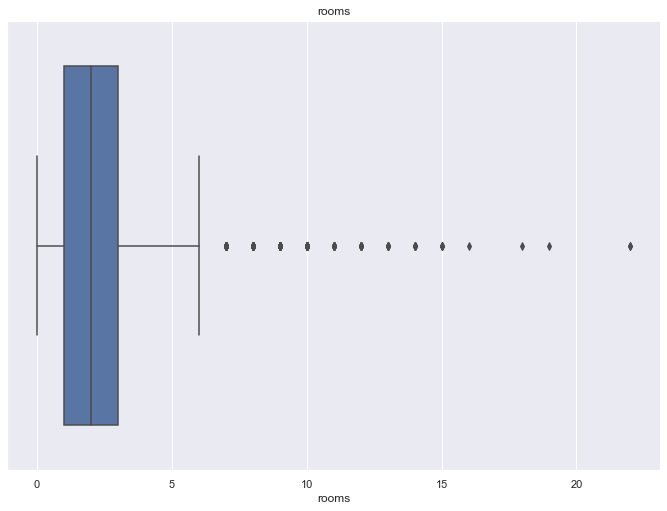

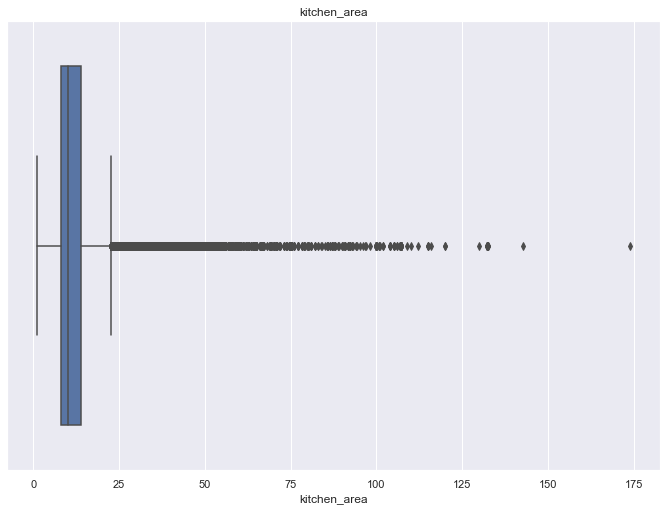

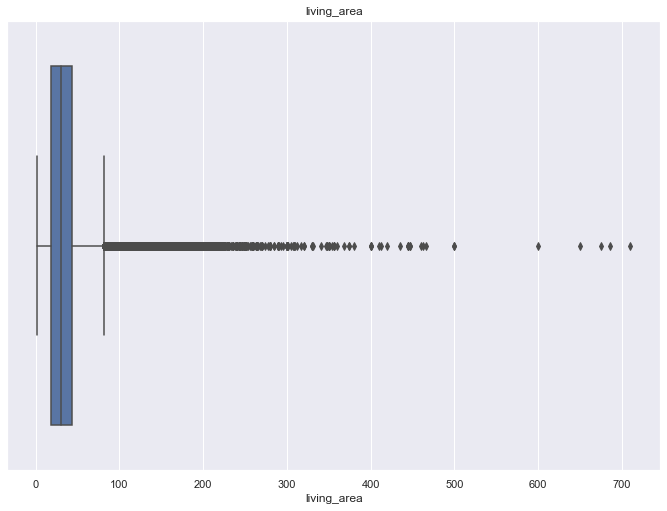

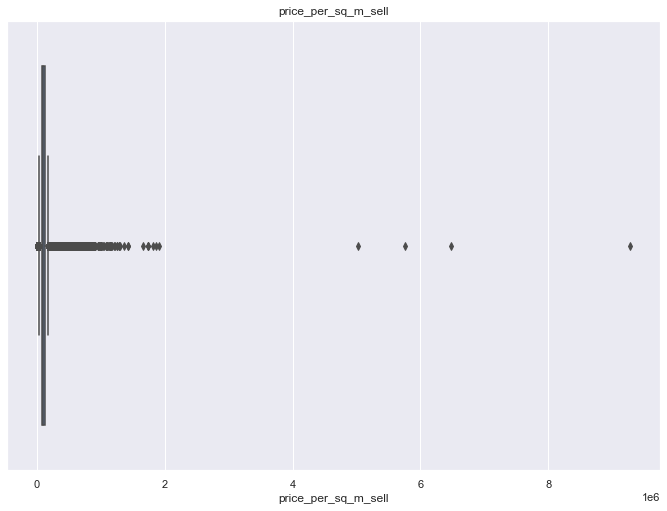

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in df_num.columns:
    sns.boxplot(df_num[i]).set_title(i)
    plt.show()

<AxesSubplot:>

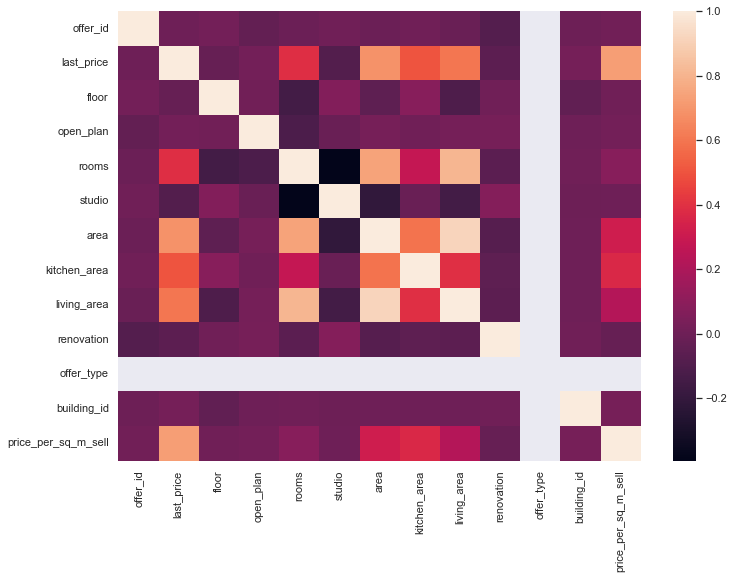

In [16]:
sns.heatmap(sell_df_sbp.corr())

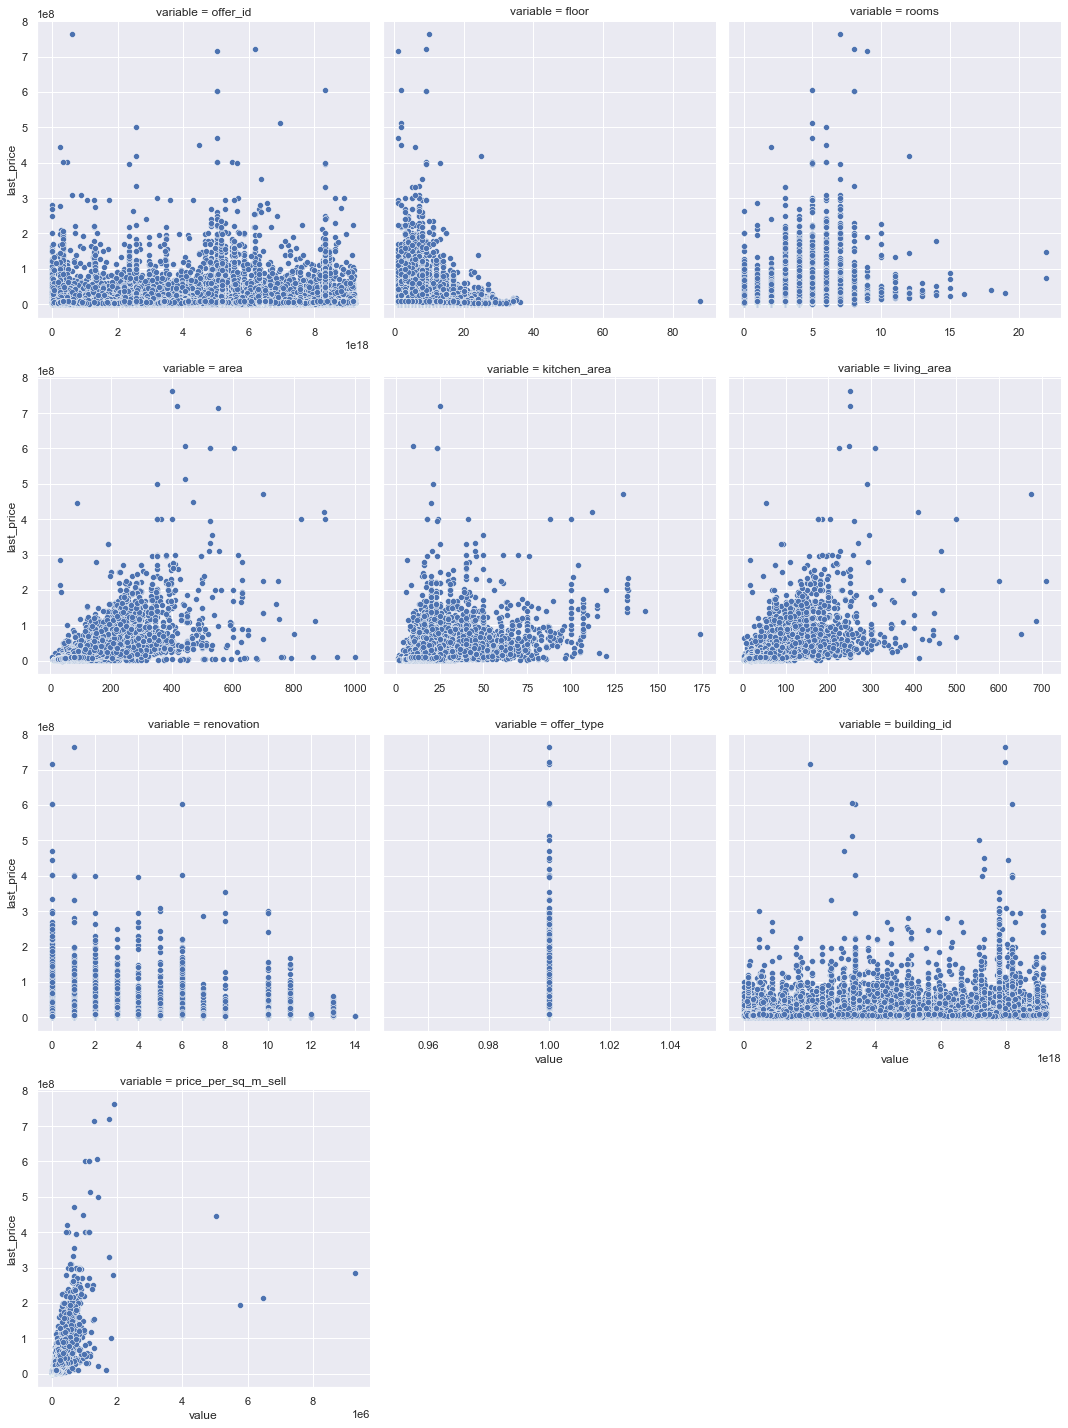

In [17]:
sns.relplot(data=sell_df_sbp.select_dtypes('number').melt(id_vars=['last_price']),            x='value', y='last_price', col='variable', col_wrap=3, 
            facet_kws=dict(sharex=False)           )

In [18]:
sell_df_sbp.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,renovation,offer_type,building_id,price_per_sq_m_sell
count,1.977920e+05,1.977920e+05,197792.000000,197792.000000,197792.000000,168799.000000,179219.000000,142614.000000,197792.0,1.977920e+05,1.977920e+05
mean,4.930802e+18,8.151205e+06,6.721783,2.024404,64.625235,11.937120,36.192785,3.467640,1.0,4.604822e+18,1.136452e+05
std,2.743008e+18,1.283477e+07,5.381079,1.166640,40.617352,7.153193,24.297953,3.944312,0.0,2.732627e+18,6.322742e+04
min,7.797270e+05,1.900000e+04,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,1.0,4.585730e+14,4.871795e+02
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.200000,8.000000,19.000000,0.000000,1.0,2.179036e+18,8.714286e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,2.000000,1.0,4.727029e+18,1.022857e+05
75%,7.278733e+18,8.200000e+06,9.000000,3.000000,76.400000,13.900000,44.000000,6.000000,1.0,6.919866e+18,1.230101e+05
max,9.223371e+18,7.630000e+08,88.000000,22.000000,1000.000000,174.000000,710.000000,14.000000,1.0,9.220297e+18,9.283388e+06


In [19]:
# Another way to clean the data. Nevertheless, I dicided not to use it since manual cleaning will provide mnore precise results

investigate = ['last_price','floor', 'rooms', 'kitchen_area', 'living_area']

iqr=scipy.stats.iqr(sell_df_sbp[investigate], axis=0)
q1=np.quantile(sell_df_sbp[investigate], .25, axis=0)
q3=np.quantile(sell_df_sbp[investigate], .75, axis=0)

# для удаления аутлайров границы
boundaries=[]
boundaries.append([*(q1-1.5*iqr)])
boundaries.append([*(q3+10*iqr)])
outliers_remedy=pd.DataFrame(boundaries, columns=investigate)

outliers_remedy

,last_price,floor,rooms,kitchen_area,living_area
0,-2550000.0,-6.0,-2.0,NaN,NaN
1,51200000.0,69.0,23.0,NaN,NaN


In [20]:
#rent_df_cleaned=rent_df_cleaned[(rent_df_cleaned.last_price >= outliers_remedy.last_price[0]) & (rent_df_cleaned.last_price <= outliers_remedy.last_price[1])]

In [21]:
sell_df_sbp.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,renovation,offer_type,building_id,price_per_sq_m_sell
count,1.977920e+05,1.977920e+05,197792.000000,197792.000000,197792.000000,168799.000000,179219.000000,142614.000000,197792.0,1.977920e+05,1.977920e+05
mean,4.930802e+18,8.151205e+06,6.721783,2.024404,64.625235,11.937120,36.192785,3.467640,1.0,4.604822e+18,1.136452e+05
std,2.743008e+18,1.283477e+07,5.381079,1.166640,40.617352,7.153193,24.297953,3.944312,0.0,2.732627e+18,6.322742e+04
min,7.797270e+05,1.900000e+04,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,1.0,4.585730e+14,4.871795e+02
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.200000,8.000000,19.000000,0.000000,1.0,2.179036e+18,8.714286e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,2.000000,1.0,4.727029e+18,1.022857e+05
75%,7.278733e+18,8.200000e+06,9.000000,3.000000,76.400000,13.900000,44.000000,6.000000,1.0,6.919866e+18,1.230101e+05
max,9.223371e+18,7.630000e+08,88.000000,22.000000,1000.000000,174.000000,710.000000,14.000000,1.0,9.220297e+18,9.283388e+06


In [22]:
sell_df_sbp = sell_df_sbp[(sell_df_sbp['last_price']<100000000) & (sell_df_sbp['last_price']>2000000)]

In [23]:
sell_df_sbp.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,renovation,offer_type,building_id,price_per_sq_m_sell
count,1.952070e+05,1.952070e+05,195207.000000,195207.000000,195207.000000,167854.000000,177638.000000,140940.000000,195207.0,1.952070e+05,1.952070e+05
mean,4.937125e+18,7.720175e+06,6.751382,2.030911,64.244301,11.861065,35.962434,3.461260,1.0,4.602801e+18,1.123718e+05
std,2.742871e+18,8.177996e+06,5.383372,1.145768,37.852993,6.831665,23.099356,3.941794,0.0,2.733158e+18,4.768928e+04
min,7.797270e+05,2.000700e+06,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,1.0,4.585730e+14,5.616475e+03
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.785000,8.000000,19.000000,0.000000,1.0,2.179036e+18,8.727273e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,2.000000,1.0,4.727029e+18,1.023038e+05
75%,7.300417e+18,8.200000e+06,9.000000,3.000000,76.300000,13.800000,44.000000,6.000000,1.0,6.909065e+18,1.229175e+05
max,9.223371e+18,9.990000e+07,88.000000,22.000000,1000.000000,174.000000,650.000000,14.000000,1.0,9.220297e+18,1.666666e+06


In [24]:
sell_df_sbp.rename(columns = {'price_per_sq_m_sell':'price_per_sq_m'}, inplace = True)

house_sell_df = sell_df_sbp.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

sell_df_sbp = sell_df_sbp.merge(house_sell_df)

In [25]:
house_sell_df.head()

,unified_address,house_price_sqm_median
0,"Россия, Санкт-Петербург, 1-й Муринский проспект, 11",102630.689500
1,"Россия, Санкт-Петербург, 1-й Муринский проспект, 13",99834.656085
2,"Россия, Санкт-Петербург, 1-й Муринский проспект, 15",91615.179391
3,"Россия, Санкт-Петербург, 1-й Муринский проспект, 17",79189.163588
4,"Россия, Санкт-Петербург, 1-й Муринский проспект, 19",97281.369639


In [26]:
sell_df_sbp.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,renovation,offer_type,building_id,price_per_sq_m,house_price_sqm_median
count,1.952070e+05,1.952070e+05,195207.000000,195207.000000,195207.000000,167854.000000,177638.000000,140940.000000,195207.0,1.952070e+05,1.952070e+05,1.952070e+05
mean,4.937125e+18,7.720175e+06,6.751382,2.030911,64.244301,11.861065,35.962434,3.461260,1.0,4.602801e+18,1.123718e+05,1.106472e+05
std,2.742871e+18,8.177996e+06,5.383372,1.145768,37.852993,6.831665,23.099356,3.941794,0.0,2.733158e+18,4.768928e+04,4.102177e+04
min,7.797270e+05,2.000700e+06,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,1.0,4.585730e+14,5.616475e+03,1.413043e+04
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.785000,8.000000,19.000000,0.000000,1.0,2.179036e+18,8.727273e+04,8.888889e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,2.000000,1.0,4.727029e+18,1.023038e+05,1.015517e+05
75%,7.300417e+18,8.200000e+06,9.000000,3.000000,76.300000,13.800000,44.000000,6.000000,1.0,6.909065e+18,1.229175e+05,1.203245e+05
max,9.223371e+18,9.990000e+07,88.000000,22.000000,1000.000000,174.000000,650.000000,14.000000,1.0,9.220297e+18,1.666666e+06,1.666666e+06


In [27]:
psm = sell_df_sbp[['house_price_sqm_median','price_per_sq_m']]

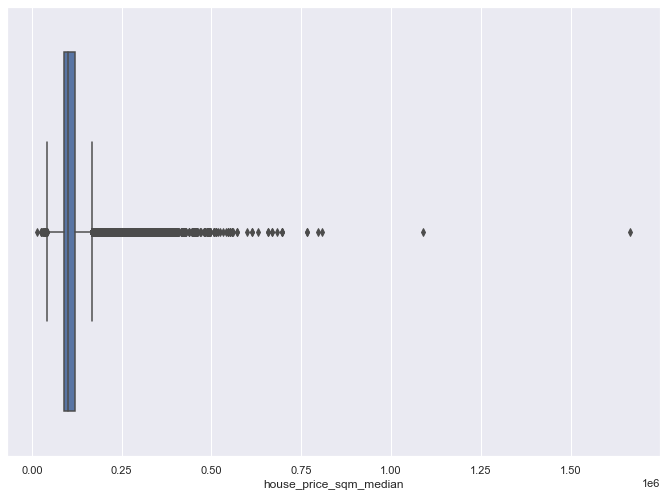

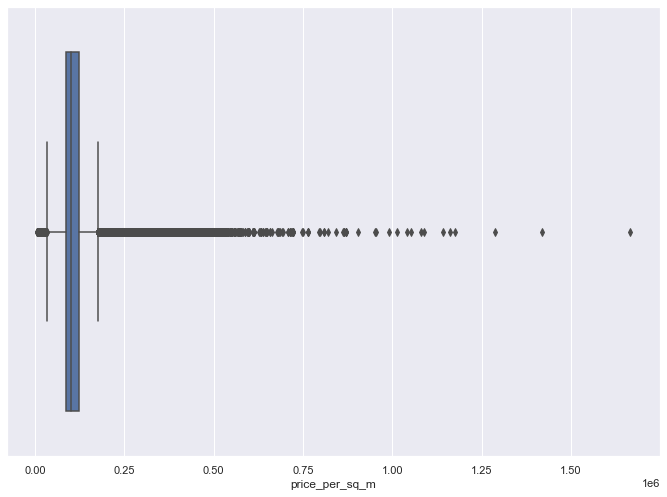

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in psm:
    sns.boxplot(psm[i])
    plt.show()

In [29]:
sell_df_cleaned = sell_df_sbp[~((sell_df_sbp.price_per_sq_m/sell_df_sbp.house_price_sqm_median) > 5)]

sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['last_price']<100000000) & (sell_df_cleaned['last_price']>2000000)]

sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m > 500000)
                                     & ((sell_df_cleaned.house_price_sqm_median < 200000)
                                        | (sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.price_per_sq_m)))]
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m < 38000)
                               & (sell_df_cleaned.house_price_sqm_median/sell_df_cleaned.price_per_sq_m >= 2))]
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m < 30000)
                                          & (sell_df_cleaned.price_per_sq_m == sell_df_cleaned.house_price_sqm_median))]

In [30]:
psm_cleaned = sell_df_cleaned[['house_price_sqm_median','price_per_sq_m']]

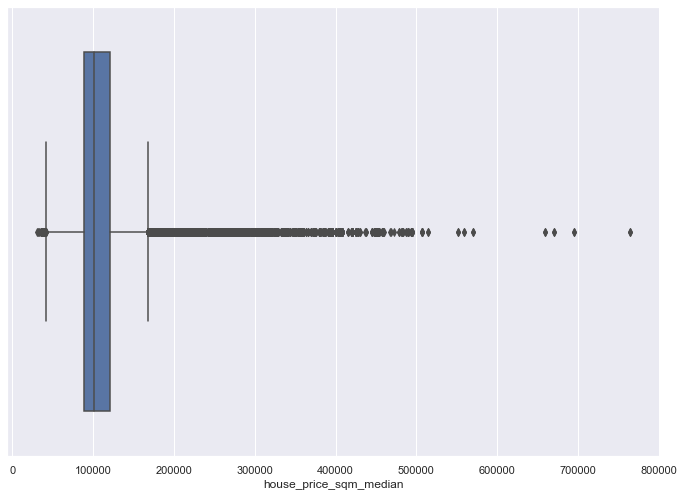

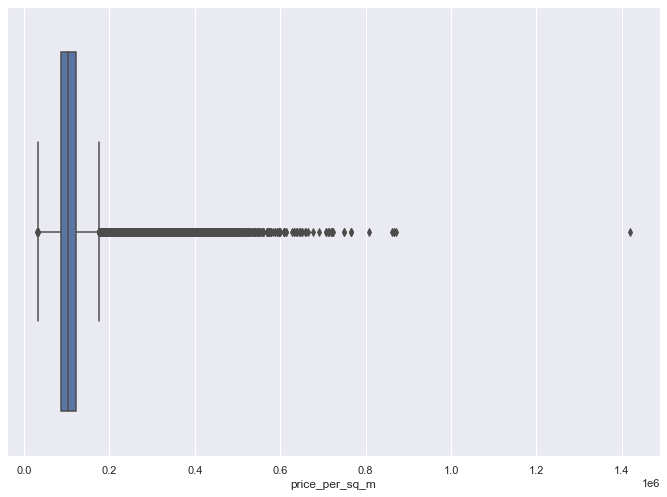

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in psm:
    sns.boxplot(psm_cleaned[i])
    plt.show()

In [32]:
sell_df_cleaned.shape

(195053, 17)

In [33]:
sell_df_cleaned.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,renovation,offer_type,building_id,price_per_sq_m,house_price_sqm_median
count,1.950530e+05,1.950530e+05,195053.000000,195053.000000,195053.000000,167732.000000,177500.000000,140812.000000,195053.0,1.950530e+05,1.950530e+05,195053.000000
mean,4.937540e+18,7.707140e+06,6.752708,2.030433,64.130524,11.856789,35.947633,3.461708,1.0,4.602872e+18,1.122410e+05,110589.762939
std,2.742839e+18,8.120982e+06,5.383787,1.145343,37.220892,6.816894,23.060323,3.942024,0.0,2.733234e+18,4.628193e+04,40503.251291
min,7.797270e+05,2.000700e+06,1.000000,0.000000,10.000000,1.040000,1.640000,0.000000,1.0,4.585730e+14,3.027273e+04,30272.727273
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.700000,8.000000,19.000000,0.000000,1.0,2.179036e+18,8.729730e+04,88888.888889
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,2.000000,1.0,4.727029e+18,1.023077e+05,101551.691398
75%,7.302240e+18,8.200000e+06,9.000000,3.000000,76.200000,13.800000,44.000000,6.000000,1.0,6.909065e+18,1.229120e+05,120312.500000
max,9.223371e+18,9.990000e+07,88.000000,22.000000,800.000000,174.000000,650.000000,14.000000,1.0,9.220297e+18,1.420000e+06,764861.111111


In [34]:
other_columns_cleaning = sell_df_cleaned[['floor','area','kitchen_area','living_area']]

In [35]:
sell_df_cleaned['floor'].quantile(0.999)

26.0

In [36]:
sell_df_cleaned[sell_df_cleaned['rooms']==0].value_counts()

Series([], dtype: int64)

In [37]:
for i in other_columns_cleaning:
    
    median = other_columns_cleaning[i].median()
    sell_df_cleaned[i] = sell_df_cleaned[i].fillna(median)

In [38]:
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['floor'] <= 27)]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['living_area'] < 350)]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['kitchen_area'] < 100)]
sell_df_cleaned = sell_df_cleaned[sell_df_cleaned['area']>11]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['area'] < 630)]

In [39]:
sell_df_cleaned.shape

(194916, 17)

**3. Most cheapest and most expensive price per sq m in St. Petersburg**

In [40]:
sell_df_cleaned[sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.house_price_sqm_median.max()]\
.groupby('unified_address').agg({'offer_id':'count', 'house_price_sqm_median' : 'mean'})\
.rename(columns={'offer_id' : 'num_appartments'})

,num_appartments,house_price_sqm_median
unified_address,,
"Россия, Санкт-Петербург, Бронницкая улица, 27",2,764861.111111


In [41]:
sell_df_cleaned[sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.house_price_sqm_median.min()]\
.groupby('unified_address').agg({'offer_id':'count', 'house_price_sqm_median' : 'mean'})\
.rename(columns={'offer_id' : 'num_appartments'})

,num_appartments,house_price_sqm_median
unified_address,,
"Россия, Санкт-Петербург, Петергоф, Широкая улица, 52",1,30272.727273


**4. Find the most expensive and the most cheapest apartment in St. Petersburg after cleaning outliers.**

In [42]:
sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.max()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,offer_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
88744,4047291,2015-09-25T00:00:00+03:00,2016-02-12T00:00:00+03:00,99900000.0,2,False,3,False,152.0,10.2,102.0,10.0,1,"Россия, Санкт-Петербург, набережная Мартынова, 62",4378677413263079878,657236.842105,506417.112299


In [43]:
sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.min()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,offer_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
130619,5614092655290296258,2017-01-19T00:00:00+03:00,2017-01-24T00:00:00+03:00,2000700.0,13,False,1,False,24.7,10.2,31.0,0.0,1,"Россия, Санкт-Петербург, улица Крыленко, 1к1с2",5915003919436159235,81000.0,96969.69697
130620,5614092655290296413,2017-01-19T00:00:00+03:00,2017-01-24T00:00:00+03:00,2000700.0,5,False,1,False,24.7,10.2,31.0,0.0,1,"Россия, Санкт-Петербург, улица Крыленко, 1к1с2",5915003919436159235,81000.0,96969.69697
130621,5614092655290296360,2017-01-19T00:00:00+03:00,2017-01-24T00:00:00+03:00,2000700.0,7,False,1,False,24.7,10.2,31.0,0.0,1,"Россия, Санкт-Петербург, улица Крыленко, 1к1с2",5915003919436159235,81000.0,96969.69697
130622,5614092655290296324,2017-01-19T00:00:00+03:00,2017-01-24T00:00:00+03:00,2000700.0,9,False,1,False,24.7,10.2,31.0,0.0,1,"Россия, Санкт-Петербург, улица Крыленко, 1к1с2",5915003919436159235,81000.0,96969.69697


**Rent cleaning before 5 task**

In [44]:
print("Rent: ",rent_df.building_id.nunique())
print("Sell: ",sell_df.building_id.nunique())

Rent:  23236
Sell:  33234


In [45]:
rent_df = spb_df[spb_df.offer_type == 2].copy()
print("Total rent data size: {}".format(len(rent_df)))
rent_df_spb = rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')].copy()
print("Rent data size in city limits: {}".format(len(rent_df_spb)))

# calculate price per sq m
rent_df_spb['price_per_sq_m'] = rent_df_spb.last_price/rent_df.area

house_rent_df = rent_df_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

rent_df_spb = rent_df_spb.merge(house_rent_df)

Total rent data size: 171186
Rent data size in city limits: 156054


In [46]:
rent_df_spb.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m,house_price_sqm_median
count,1.560540e+05,1.560540e+05,156054.000000,156054.000000,156054.000000,118889.000000,123565.000000,123362.00000,103117.000000,156054.0,156054.0,1.560540e+05,156054.000000,156054.000000
mean,4.678682e+18,3.301523e+04,6.690434,1.606098,53.721801,11.656506,30.618863,71.93907,3.689285,2.0,2.0,4.567835e+18,610.385038,591.450076
std,2.636512e+18,4.271156e+04,4.973817,0.879859,24.856166,82.073251,17.764563,28.44072,4.486899,0.0,0.0,2.695468e+18,920.155765,246.583612
min,8.726400e+05,1.300000e+02,1.000000,0.000000,11.000000,2.000000,2.000000,0.00000,0.000000,2.0,2.0,4.585730e+14,1.203704,76.923077
25%,2.684536e+18,2.000000e+04,3.000000,1.000000,38.000000,8.000000,18.000000,50.00000,0.000000,2.0,2.0,2.153540e+18,469.387755,500.000000
50%,5.141797e+18,2.500000e+04,5.000000,1.000000,46.000000,10.000000,27.000000,75.00000,1.000000,2.0,2.0,4.697630e+18,555.555556,552.777778
75%,6.842588e+18,3.500000e+04,9.000000,2.000000,62.000000,12.000000,37.000000,100.00000,10.000000,2.0,2.0,6.837285e+18,675.675676,641.025641
max,9.223288e+18,4.900000e+06,92.000000,5.000000,200.000000,25000.000000,2015.000000,100.00000,11.000000,2.0,2.0,9.220297e+18,121428.571429,74509.803922


In [47]:
house_rent_df

,unified_address,house_price_sqm_median
0,"Россия, Санкт-Петербург, 1-й Муринский проспект, 11",571.383648
1,"Россия, Санкт-Петербург, 1-й Муринский проспект, 13",500.000000
2,"Россия, Санкт-Петербург, 1-й Муринский проспект, 15",569.743935
3,"Россия, Санкт-Петербург, 1-й Муринский проспект, 17",600.000000
4,"Россия, Санкт-Петербург, 1-й Муринский проспект, 19",482.142857
...,...,...
19852,"Россия, Санкт-Петербург, шоссе Революции, 50",511.111111
19853,"Россия, Санкт-Петербург, шоссе Революции, 84",485.714286
19854,"Россия, Санкт-Петербург, шоссе Революции, 84к1",628.571429
19855,"Россия, Санкт-Петербург, шоссе Революции, 8А",550.000000


In [48]:
rent_df_cleaned = rent_df_spb[~((rent_df_spb.price_per_sq_m/rent_df_spb.house_price_sqm_median) > 5)]
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000)
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000)
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m < 250)
                               & (rent_df_cleaned.house_price_sqm_median/rent_df_cleaned.price_per_sq_m >= 2))]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m < 200)
                                          & (rent_df_cleaned.price_per_sq_m == rent_df_cleaned.house_price_sqm_median))]

In [49]:
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned['last_price']<200000]

rent_df_cleaned.drop(columns=['category_type'], inplace=True)
rent_df_cleaned.drop(columns=['agent_fee'], inplace=True)

rent_df_cleaned['open_plan'] = rent_df_cleaned['open_plan'].astype('int')
rent_df_cleaned['studio'] = rent_df_cleaned['studio'].astype('int')

In [50]:
rent_df_cleaned.head()

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,offer_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
0,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,0,1,0,28.0,8.0,20.0,3.0,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714,512.820513
1,4593125,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,0,2,0,59.0,10.0,35.0,3.0,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,406.779661,512.820513
2,4586184,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,6,0,1,0,36.0,9.0,17.0,3.0,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,500.000000,512.820513
3,5308071,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,8,0,1,0,39.0,10.0,18.0,0.0,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,461.538462,512.820513
4,7534283612538021121,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,3,0,1,0,36.0,8.0,18.0,11.0,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,527.777778,512.820513


## 5 task

In [57]:
house_rent_df_5task = rent_df_cleaned.groupby('building_id').price_per_sq_m.median().reset_index()
house_rent_df_5task.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_rent'}, inplace = True)

In [58]:
house_rent_df_5task

,building_id,house_price_sqm_median_rent
0,458573008430269,662.020906
1,1785805724177444,600.000000
2,3286884802341379,473.684211
3,3603962364551559,500.000000
4,3603962364551560,434.782609
...,...,...
19808,9217640295586864077,916.666667
19809,9217640295587698130,1222.222222
19810,9217640295588649554,671.428571
19811,9218305025595159775,985.110803


In [59]:
house_sell_df_5task = sell_df_cleaned.groupby('building_id').price_per_sq_m.median().reset_index()
house_sell_df_5task.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_sell'}, inplace = True)

In [60]:
house_sell_df_5task

,building_id,house_price_sqm_median_sell
0,458573008430269,141157.760814
1,1785805724181110,93941.684665
2,3603962364551559,123231.911249
3,3603962364551561,98925.205181
4,3603962364553482,86649.659864
...,...,...
22788,9217640295586864077,121908.967391
22789,9217640295588649554,157096.424702
22790,9218305025595159777,210843.373494
22791,9219962699705661932,108333.333333


In [61]:
final_df = pd.merge(house_sell_df_5task, house_rent_df_5task, on='building_id', how='inner')

final_df

,building_id,house_price_sqm_median_sell,house_price_sqm_median_rent
0,458573008430269,141157.760814,662.020906
1,3603962364551559,123231.911249,500.000000
2,3603962364551561,98925.205181,531.015038
3,3603962364553483,84576.271186,495.762712
4,13212466575073986,105202.312139,525.000000
...,...,...,...
16412,9214053373585418118,130018.774400,783.168505
16413,9214854470554944441,76785.714286,439.692982
16414,9217640295586864077,121908.967391,916.666667
16415,9217640295588649554,157096.424702,671.428571


In [66]:
final_df= final_df.assign(C= final_df['house_price_sqm_median_sell'] / final_df['house_price_sqm_median_rent'])
final_df.rename(columns = {'C': 'to cover the purchase (through sqm)'}, inplace = True)
final_df

,building_id,house_price_sqm_median_sell,house_price_sqm_median_rent,to cover the purchase (through sqm)
0,458573008430269,141157.760814,662.020906,213.222512
1,3603962364551559,123231.911249,500.000000,246.463822
2,3603962364551561,98925.205181,531.015038,186.294546
3,3603962364553483,84576.271186,495.762712,170.598291
4,13212466575073986,105202.312139,525.000000,200.385356
...,...,...,...,...
16412,9214053373585418118,130018.774400,783.168505,166.016347
16413,9214854470554944441,76785.714286,439.692982,174.634841
16414,9217640295586864077,121908.967391,916.666667,132.991601
16415,9217640295588649554,157096.424702,671.428571,233.973398


In [70]:
sorted_df = final_df.sort_values('to cover the purchase (through sqm)', ascending=True)

In [71]:
sorted_df

,building_id,house_price_sqm_median_sell,house_price_sqm_median_rent,to cover the purchase (through sqm)
889,441906427059019337,91517.857143,1750.000000,52.295918
10727,6216945929824351312,88466.819222,1666.666667,53.080092
8555,4873056317681536391,74185.030077,1333.333333,55.638773
1773,733773556320921673,61875.000000,1111.111111,55.687500
12493,6976487065451391863,89314.194577,1555.555556,57.416268
...,...,...,...,...
14908,8395049726808165244,396153.846154,475.609756,832.938856
14556,8192868485509619740,448228.993289,531.250000,843.725164
7710,4378677413263079911,495064.108117,576.158940,859.249199
15895,8954021676237795759,360000.000000,350.000000,1028.571429


In [65]:
final_df.C.min()

52.29591836734694

**Let's do the same procedure for lat price**

In [88]:
house_rent_df_5task_1 = rent_df_cleaned.groupby('building_id').last_price.median().reset_index()
house_rent_df_5task_1.rename(columns = {'last_price': 'price_median_rent'}, inplace = True)

house_sell_df_5task_1 = sell_df_cleaned.groupby('building_id').last_price.median().reset_index()
house_sell_df_5task_1.rename(columns = {'last_price': 'price_median_sell'}, inplace = True)

In [89]:
final_df_1 = pd.merge(house_sell_df_5task_1, house_rent_df_5task_1, on='building_id', how='inner')

final_df_1

,building_id,price_median_sell,price_median_rent
0,458573008430269,5095000.0,27500.0
1,3603962364551559,5745000.0,26500.0
2,3603962364551561,5500000.0,31000.0
3,3603962364553483,4990000.0,26000.0
4,13212466575073986,6350000.0,27000.0
...,...,...,...
16412,9214053373585418118,12963000.0,50000.0
16413,9214854470554944441,4800000.0,19000.0
16414,9217640295586864077,9400000.0,55000.0
16415,9217640295588649554,8000000.0,31500.0


In [90]:
final_df_1= final_df_1.assign(C= final_df_1['price_median_sell'] / final_df_1['price_median_rent'])
final_df_1.rename(columns = {'C': 'to cover the purchase (through lat price)'}, inplace = True)
final_df_1

,building_id,price_median_sell,price_median_rent,to cover the purchase (through lat price)
0,458573008430269,5095000.0,27500.0,185.272727
1,3603962364551559,5745000.0,26500.0,216.792453
2,3603962364551561,5500000.0,31000.0,177.419355
3,3603962364553483,4990000.0,26000.0,191.923077
4,13212466575073986,6350000.0,27000.0,235.185185
...,...,...,...,...
16412,9214053373585418118,12963000.0,50000.0,259.260000
16413,9214854470554944441,4800000.0,19000.0,252.631579
16414,9217640295586864077,9400000.0,55000.0,170.909091
16415,9217640295588649554,8000000.0,31500.0,253.968254


In [92]:
sorted_df_1 = final_df_1.sort_values('to cover the purchase (through lat price)', ascending=True)
sorted_df_1

,building_id,price_median_sell,price_median_rent,to cover the purchase (through lat price)
6913,3967985793187418353,2230000.0,150000.0,14.866667
3091,1627973416240229632,4600000.0,180000.0,25.555556
9637,5553660887271054733,4700000.0,140000.0,33.571429
1913,815795893180413008,2556000.0,75000.0,34.080000
6567,3673956658633628256,4100000.0,120000.0,34.166667
...,...,...,...,...
11921,6749677014473038546,29900000.0,15000.0,1993.333333
15855,8932634527448966302,36229000.0,16000.0,2264.312500
13683,7528309176946493882,85000000.0,26000.0,3269.230769
1194,536301776913345245,83500000.0,25000.0,3340.000000


**So, we should purchase the houses which are in high places in boths tops simultaneously**